In [12]:
import numpy as np
#from tensorflow import keras
import keras

print('keras version:', keras.__version__)
print('keras backend:', keras.backend.backend())

keras version: 2.2.4.1
keras backend: plaidml.keras.backend


In [13]:
#load data
data = keras.datasets.mnist
#data = keras.datasets.fashion_mnist
#data = keras.datasets.cifar10
num_channels = 1


In [14]:
(x_train, y_train), (x_test, y_test) = data.load_data()

In [15]:
print('train shape:', x_train.shape)
print('train y:', y_train.shape)
print('test_shape:', x_test.shape)
print('test y:', y_test.shape)

num_labels = len(np.unique(y_train))
image_size = x_train.shape[2]

print('num of labels:', num_labels)
print('image size:', image_size)


train shape: (60000, 28, 28)
train y: (60000,)
test_shape: (10000, 28, 28)
test y: (10000,)
num of labels: 10
image size: 28


In [16]:
# convert the shape of data depending on the image data format
is_channels_first = (keras.backend.image_data_format() == 'channels_first')

if is_channels_first :
    x_train2 = x_train.reshape(x_train.shape[0], num_channels, image_size, image_size)
    x_test2 = x_test.reshape(x_test.shape[0], num_channels, image_size, image_size)
    input_shape = (num_channels, image_size, image_size)
else:
    x_train2 = x_train.reshape(x_train.shape[0], image_size, image_size, num_channels)
    x_test2 = x_test.reshape(x_test.shape[0], image_size, image_size, num_channels)
    input_shape = (image_size, image_size, num_channels)

In [17]:
x_train2 = x_train2.astype('float32') / 255
x_test2 = x_test2.astype('float32') / 255

#hot encode
y_train2 = keras.utils.to_categorical(y_train)
y_test2 = keras.utils.to_categorical(y_test)

In [18]:
print("revised x_train shape:", x_train2.shape)
print('revised y_train shape:', y_train2.shape)
print('revised x_test shape:', x_test2.shape)
print('revised y_test shape:', y_test2.shape)
print('input shape:',input_shape)

revised x_train shape: (60000, 28, 28, 1)
revised y_train shape: (60000, 10)
revised x_test shape: (10000, 28, 28, 1)
revised y_test shape: (10000, 10)
input shape: (28, 28, 1)


In [19]:
num_hidden_layers = 512
epochs=20
batch_size=400

In [20]:
#model
model = keras.models.Sequential()
model.add( keras.layers.Conv2D(64, kernel_size=(3,3), input_shape=input_shape , activation='relu' , padding='same'))
model.add( keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu' , padding='same'))
model.add( keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu' , padding='same'))
model.add( keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu' , padding='same'))
model.add( keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add( keras.layers.Dropout(0.3))

model.add( keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu' , padding='same'))
model.add( keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu' , padding='same'))
model.add( keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add( keras.layers.Dropout(0.4))

model.add( keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu' , padding='same'))
model.add( keras.layers.Conv2D(512, kernel_size=(3,3), activation='relu' , padding='same'))
model.add( keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add( keras.layers.Dropout(0.5))

model.add( keras.layers.Flatten())
model.add( keras.layers.Dense(512, activation='relu'))
model.add( keras.layers.Dropout(0.5))
model.add( keras.layers.Dense(10, activation='softmax'))

# compile to model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 128)         0         
__________

In [21]:
#train the model with train data
fit_history = model.fit(x_train2, y_train2,
  epochs=epochs ,
  batch_size=batch_size,
  validation_data=(x_test2,y_test2)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20


INFO:plaidml:Analyzing Ops: 184 of 597 operations complete
INFO:plaidml:Analyzing Ops: 232 of 597 operations complete


59600/60000 [============================>.] - ETA: 0s - loss: 0.8893 - acc: 0.6814

INFO:plaidml:Analyzing Ops: 79 of 151 operations complete


60000/60000 [==============================] - 96s 2ms/step - loss: 0.8840 - acc: 0.6833 - val_loss: 0.0677 - val_acc: 0.9781
Epoch 2/20
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0867 - acc: 0.9763 - val_loss: 0.0362 - val_acc: 0.9891
Epoch 3/20
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0585 - acc: 0.9840 - val_loss: 0.0340 - val_acc: 0.9907
Epoch 4/20
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0475 - acc: 0.9873 - val_loss: 0.0274 - val_acc: 0.9921
Epoch 5/20
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0349 - acc: 0.9904 - val_loss: 0.0256 - val_acc: 0.9934
Epoch 6/20
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0307 - acc: 0.9915 - val_loss: 0.0211 - val_acc: 0.9943
Epoch 7/20
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0293 - acc: 0.9916 - val_loss: 0.0267 - val_acc: 0.9922
Epoch 8/20
60000/60000 [============================

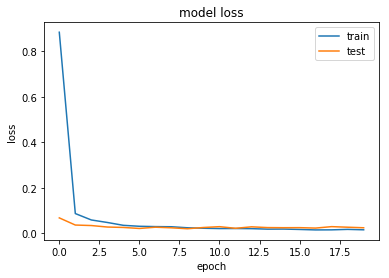

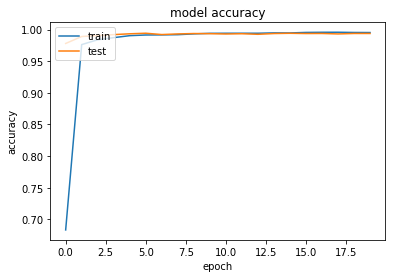

In [22]:
%matplotlib inline
from matplotlib import pyplot as plt

# show procession of training...
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.plot(fit_history.history['acc'])
plt.plot(fit_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.close()

### this model achieved about 93% accuracy on the test data